In [ ]:
# !unzip PARKINSON_HW.zip

In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt

random.seed(1)

In [ ]:
# data = pd.read_csv("new_dataset/parkinson/H_P000-0001.txt", sep=';', header=0, names=['a', 'b', 'c', 'Pressure', 'GripAngle', 'd', 'Test ID'])
dfs = []

directory = "new_dataset/parkinson"
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    d = pd.read_csv(f, sep=';', header=0, names=['a', 'b', 'c', 'Pressure', 'GripAngle', 'd', 'Test ID'])
    dfs.append(d)

directory = "hw_dataset/parkinson"
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    d = pd.read_csv(f, sep=';', header=0, names=['a', 'b', 'c', 'Pressure', 'GripAngle', 'd', 'Test ID'])
    dfs.append(d)

directory = "hw_dataset/control"
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    d = pd.read_csv(f, sep=';', header=0, names=['a', 'b', 'c', 'Pressure', 'GripAngle', 'd', 'Test ID'])
    dfs.append(d)

result = pd.concat(dfs)
print(result)




        a    b   c  Pressure  GripAngle           d  Test ID
0     373  195   0        38       1480     6324971        0
1     373  195   0        71       1470     6324978        0
2     373  194   0       106       1470     6324985        0
3     373  194   0       136       1480     6324992        0
4     372  194   0       156       1490     6324999        0
...   ...  ...  ..       ...        ...         ...      ...
5071  398  201   0       797        900  1732740739        1
5072  398  201  12       661        870  1732740746        1
5073  398  201  24       418        900  1732740753        1
5074  398  201  36       235        870  1732740760        1
5075  398  202  68        24        820  1732740767        1

[524666 rows x 7 columns]


In [ ]:
X = result.iloc[:, 3:5].to_numpy()
Y = result.iloc[:, 6].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.fit_transform(X)
print(X_norm)

[[0.03714565 0.41340782]
 [0.06940371 0.41061453]
 [0.10361681 0.41061453]
 ...
 [0.40860215 0.25139665]
 [0.22971652 0.24301676]
 [0.02346041 0.22905028]]


In [ ]:
zeros_list = [i for i in range(len(Y)) if Y[i] == 0]
ones_list = [i for i in range(len(Y)) if Y[i] == 1]
twos_list = [i for i in range(len(Y)) if Y[i] == 2]

random.shuffle(zeros_list)
random.shuffle(ones_list)
random.shuffle(twos_list)

zeros_graph = zeros_list[:30]
ones_graph = ones_list[:30]
twos_graph = twos_list[:30]

ids_graph = zeros_graph + ones_graph + twos_graph

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_norm, Y)

GaussianNB()

In [ ]:
def plot_points(x, y):
    c = "bgr"
    m = "xos"
    for i, point in enumerate(x):
      plt.plot(point[0], point[1], c[y[i]] + m[y[i]])



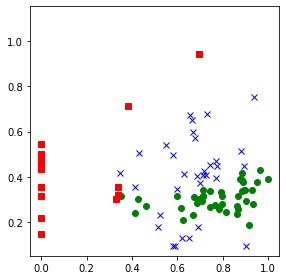

In [ ]:
plt.figure()
plot_points(X_norm[ids_graph], gnb.predict(X_norm[ids_graph]))
plot_contours(xx, yy, x_range, y_range, u, sigma)
plt.axis("square")
plt.tight_layout()
plt.show()